## Mean-field normalisation
**May 5th**  <br />

In [2]:
# import module

import numpy as np 
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import functions.WC_model as wc
import functions.steady_state as ss
import functions.pert_protocol as pert
import functions.parameters as params
import functions.name_list as NL
import functions.colour_scheme as colour
import functions.get_average as get_average

# reload(pert)
reload(params)
reload(ss)
reload(wc)
reload(pert)
reload(NL)

<module 'functions.name_list' from '/Users/yiyang/Desktop/perturbation_fractions_040523/functions/name_list.py'>

In [2]:
# Define core matrix
# Absolute values (no need to consider signs)

J=0.4   # synapses of interest
k=4    # the rest connection


# to pyr
pyr_pyr = 0.1
pyr_pv = J
pyr_som = J

# to pv
pv_pyr = J
pv_pv = 0.1
pv_som = 0.1

# to som
som_pyr = J
som_pv = 0
som_som = 0

core_mat = np.array([[pyr_pyr,pyr_pv,pyr_som],
                     [pv_pyr,pv_pv,pv_som],
                     [som_pyr,som_pv,som_som]
                    ])

# n_neurones = [n_pyr, n_pv, n_som]
n_neurones = [100,50,50]
# n_neurones = [1,1,1]

W_mean_field = params.mean_field_weight([1,1,1], core_mat)
W = params.weight_mat_extended(n_neurones, W_mean_field)


N = np.sum(n_neurones)
tau = params.tau_generator(n_neurones, 20)
tau_x = params.tau_x_generator(n_neurones, 30)

neurone_colors = colour.neurone_color_coding(n_neurones)
synapse_colors = colour.synapse_color_coding(n_neurones) # get color codes for each synapse
names = NL.neurone_names(n_neurones)


### Threshold calculation (gain baseline activity)

In [3]:
dt = 0.1
T_dur = 30
T_betw = 90
N_rep = 10
pert_fraction = [1,1,1]
pert_size = [1,1,1]
# pert_size = [0,0,0]

eta_pre = params.eta_mat_generator(n_neurones, 0)

T,S_pre,S = pert.protocol(n_neurones, pert_fraction, T_dur, T_betw, N_rep, pert_size, dt=0.1)
r_pre, W_all_pre = wc.solver_simplified(W, eta_pre, tau, tau_x, T, S, dt=0.1)

x_basal = r_pre[:,len(r_pre[0])-1]

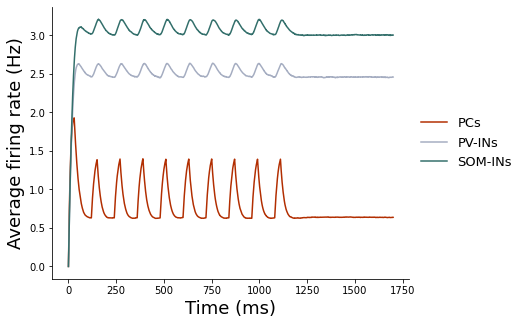

In [4]:
# Plot average activity for each population

population_colors = ['#b22e01', '#a5adc1', '#336f6b']
avg_r = get_average.avg_activity(r_pre, n_neurones)

# sns.set_theme("talk")
# sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(avg_r)):
    ax.plot(T, avg_r[i,:], c = f'{population_colors[i]}')

ax.set_xlabel('Time (ms)', fontdict={'size':18, 'color':'black'})
ax.set_ylabel('Average firing rate (Hz)', fontdict={'size':18, 'color':'black'})
ax.grid(False)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['PCs', 'PV-INs', 'SOM-INs'], loc='center left', bbox_to_anchor=(1, 0.5), prop = {"size": 13}, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

ax.tick_params(color='black', labelcolor='black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.title('Average activities of sub-populations')

plt.show()

### Simulations

In [5]:
eta = params.eta_mat_generator(n_neurones, 0.0003)
eta = params.eta_mat_generator(n_neurones, 0)

# network simulation
r, W_all, x_all = wc.solver(W, eta, tau, tau_x, x_basal, T, S, dt=0.1)

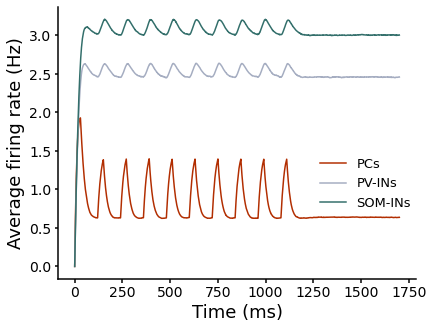

In [6]:
# Plot average activity for each population

population_colors = ['#b22e01', '#a5adc1', '#336f6b']
avg_r = get_average.avg_activity(r, n_neurones)

# sns.set_theme("talk")
# sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(avg_r)):
    ax.plot(T, avg_r[i,:], c = f'{population_colors[i]}')

ax.set_xlabel('Time (ms)', fontdict={'size':18, 'color':'black'})
ax.set_ylabel('Average firing rate (Hz)', fontdict={'size':18, 'color':'black'})
ax.grid(False)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['PCs', 'PV-INs', 'SOM-INs'], loc='center left', bbox_to_anchor=(0.7, 0.35), 
          prop = {"size": 13}, frameon=False, labelcolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)


ax.tick_params(color='black', labelcolor='black',width=1.5)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# plt.title('Average activities of sub-populations')

plt.show()


In [7]:
# plot average synapse changes where the initial eta is not zero

avg_synapse_names, avg_position_index = NL.synapse_names_positions(params.eta_mat_generator([1,1,1]), [1,1,1])
avg_synapse_names = ['$w_{EP}$', '$w_{PE}$', '$w_{SE}$']
# avg_synapse_names = ['pyr<-pv', 'pyr<-som', 'pv<-pyr', 'som<-pyr']

#colors of synapses
avg_synapse_colors = colour.synapse_color_coding([1,1,1])

# compute synapse average at each time point
synapse_average = []
for i in range(len(W_all)):
    synapse_average.append(get_average.avg_weight(W_all[i], n_neurones))

In [8]:
w_PE_all=[synapse_average[i][1,0]*1000 for i in range(len(W_all))]
w_SE_all=[synapse_average[i][2,0]*10 for i in range(len(W_all))]
w_EP_all=[synapse_average[i][0,1]*1000 for i in range(len(W_all))]

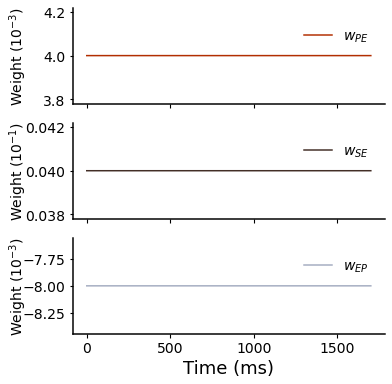

In [9]:

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(7, 6))

avg_synapse_names = ['$w_{PE}$', '$w_{SE}$', '$w_{EP}$']
ax[0].plot(T, w_PE_all, c='#b22e01')
ax[1].plot(T, w_SE_all, c='#432e26')
ax[2].plot(T, w_EP_all, c='#a5adc1')

x_ticks=[0,500,1000,1500]
x_labels=[0,500,1000,1500]

for i in [0,1,2]:
    # ax[i].yaxis.set_label_coords(-0.15,0.6)
    ax[i].grid(False)
    # Shrink current axis by 20%
    box = ax[i].get_position()
    ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend at the bottom of the current axis
    ax[i].legend([avg_synapse_names[i]], loc='center left', 
                 bbox_to_anchor=(0.7, 0.7), prop = {"size": 14}, ncol=1, frameon=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    # ax[0].spines['bottom'].set_visible(False)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['left'].set_color('black')
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].tick_params(color='black', labelcolor='black', width=1.1, labelsize=14)
    ax[i].yaxis.set_label_coords(-0.14,0.5)

    

ax[2].set_xlabel('Time (ms)', fontdict={'size':18, 'color':'black'})
# plt.xticks(ticks=x_ticks, labels=x_labels)
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])

ax[0].set_ylabel("Weight ($10^{-3}$)", fontdict={'size':14, 'color':'black'})
ax[1].set_ylabel("Weight ($10^{-1}$)", fontdict={'size':14, 'color':'black'})
ax[2].set_ylabel("Weight ($10^{-3}$)", fontdict={'size':14, 'color':'black'})

plt.show()

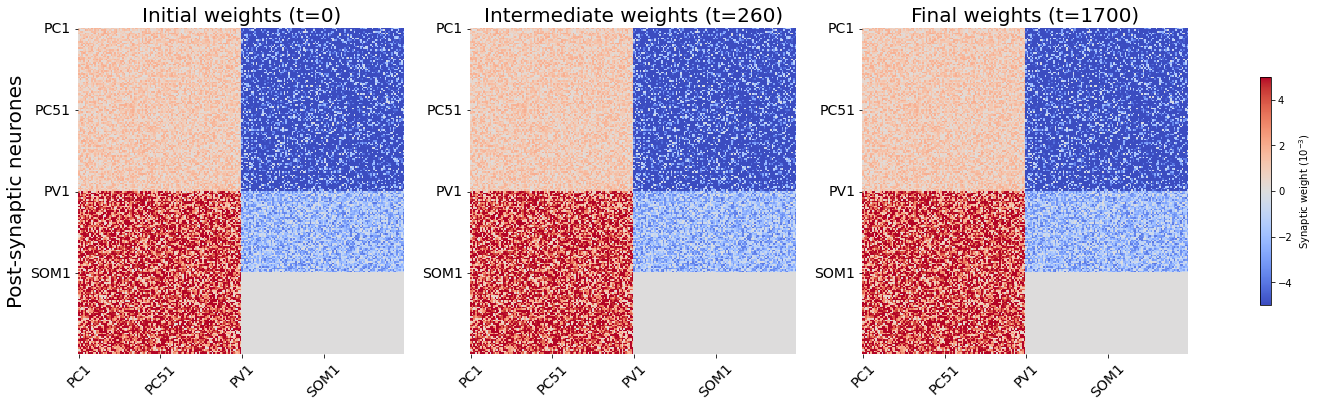

In [10]:

W_init = pd.DataFrame(W_all[0]*1000, columns=names, index=names)
W_med = pd.DataFrame(W_all[260]*1000, columns=names, index=names)
W_end = pd.DataFrame(W_all[len(W_all)-1]*1000, columns=names, index=names)

W_change = W_end.subtract(W_init)

weight_data = [W_init, W_med, W_end]
stage_names = ["Initial weights (t=0)", "Intermediate weights (t=260)", "Final weights (t=1700)"]

fig, ax = plt.subplots(ncols=3, figsize=(18,6))

for i in range(len(weight_data)):
    sns.heatmap(weight_data[i], vmin=-5, vmax=5, center=0, square=True, ax=ax[i], cmap='coolwarm', cbar=False, xticklabels=50, yticklabels=50) # annot_kws={'size': 15}
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, fontdict={'size':14, 'color':'black'})
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0, fontdict={'size':14, 'color':'black'})
    # ax[i].set_xlabel('Pre-synaptic neurones', fontdict={'size':20, 'color':'black'})
    if i==0:
        ax[i].set_ylabel('Post-synaptic neurones', fontdict={'size':20, 'color':'black'})
    ax[i].set_title(f"{stage_names[i]}", fontdict={'size':20, 'color':'black'})


plt.subplots_adjust(left=0,
                    right=1.1,
                    wspace=0.1,
                    hspace=0.1)

cb = fig.colorbar(ax[1].collections[0], ax=ax.ravel().tolist(), shrink=0.7)
cb.set_label("Synaptic weight ($10^{-3}$)")

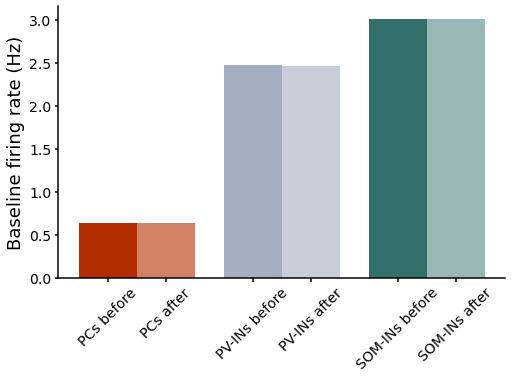

In [11]:
# Changes in steady state (analytical solution)

baseline_activity = np.array([np.average(x_basal[:100]),np.average(x_basal[101:151]),np.average(x_basal[151:])])
after_activity = np.array(avg_r[:,len(avg_r[0])-1])


species = ("PCs before", "PCs after", 
            "PV-INs before", "PV-INs after",
            "SOM-INs before", "SOM-INs after")
width = 0.4

fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(3)  # the label locations

population_colors_1 = ['#b22e01', '#a5adc1', '#336f6b']
population_colors_2 = ['#D08166', '#C9CDD9', '#99B7B5']


for i in x:
    ax.bar(i+1-width/2, baseline_activity[i], width=width, color=population_colors_1[i])
    ax.bar(i+1+width/2, after_activity[i], width=width, color=population_colors_2[i])

ax.grid(False)

ax.set_ylabel('Baseline firing rate (Hz)', fontdict={'size':18, 'color':'black'})
ax.set_xticks([0.8, 1.2, 1.8, 2.2, 2.8, 3.2], species, rotation=45)

ax.tick_params(color='black', labelcolor='black')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)

ax.tick_params(color='black', labelcolor='black',width=1.5)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# ax.legend(['Before perturbation', 'After perturbation'], prop = {"size": 13}, frameon=False)

plt.show()

In [12]:
# # average weight change

# W_init = pd.DataFrame(get_average.avg_weight(W_all[0], n_neurones), columns=['Pyr','PV','SOM'], index=['Pyr','PV','SOM'])
# W_med = pd.DataFrame(get_average.avg_weight(W_all[2500], n_neurones), columns=['Pyr','PV','SOM'], index=['Pyr','PV','SOM'])
# W_end = pd.DataFrame(get_average.avg_weight(W_all[len(W_all)-1], n_neurones), columns=['Pyr','PV','SOM'], index=['Pyr','PV','SOM'])

# weight_data = [W_init, W_med, W_end]
# stage_names = ["Initial average weights", "Intermediate average weights", "Final average weights"]

# fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

# for i in range(len(weight_data)):
#     sns.heatmap(weight_data[i], vmin=-1, vmax=1, center=0, annot=True, square=True, ax=ax[i], cmap='coolwarm', cbar=False) # annot_kws={'size': 15}
#     ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#     ax[0].set_yticklabels(ax[i].get_yticklabels(), rotation=0)
#     ax[i].set_title(f"{stage_names[i]}")


# ax[1].set_yticklabels([])
# ax[2].set_yticklabels([])


# cb = fig.colorbar(ax[1].collections[0], ax=ax.ravel().tolist(), shrink=0.7)
# cb.set_label("Value Range")


In [13]:

# W_init = pd.DataFrame(W_all[0], columns=names, index=names)
# W_med = pd.DataFrame(W_all[2500], columns=names, index=names)
# W_end = pd.DataFrame(W_all[len(W_all)-1], columns=names, index=names)

# W_change = W_end.subtract(W_init)

# weight_data = [W_init, W_med, W_end]
# stage_names = ["Initial weights (t=0)", "Intermediate weights (t=?)", "Final weights (t=2350 ms)"]

# fig, ax = plt.subplots(ncols=3, figsize=(18,6))

# for i in range(len(weight_data)):
#     sns.heatmap(weight_data[i], vmin=-0.1, vmax=0.1, center = 0, square=True, ax=ax[i], cmap='coolwarm', cbar=False, xticklabels=80, yticklabels=80) # annot_kws={'size': 15}
#     ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, fontdict={'size':14, 'color':'black'})
#     ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0, fontdict={'size':14, 'color':'black'})
#     ax[i].set_xlabel('Pre-synaptic neurones', fontdict={'size':20, 'color':'black'})
#     if i==0:
#         ax[i].set_ylabel('Post-synaptic neurones', fontdict={'size':20, 'color':'black'})
#     ax[i].set_title(f"{stage_names[i]}")


# plt.subplots_adjust(left=0,
#                     right=1.1,
#                     wspace=0.1,
#                     hspace=0.1)

# cb = fig.colorbar(ax[1].collections[0], ax=ax.ravel().tolist(), shrink=0.6)
# # cb.set_label("Value Range")


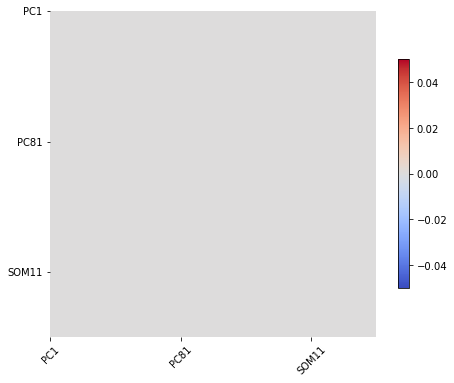

In [14]:
W_change = W_end.subtract(W_init)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(W_change, vmin=-0.05, vmax=0.05, center = 0, square=True, cmap='coolwarm', cbar=False, xticklabels=80, yticklabels=80) # annot_kws={'size': 15}
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

cb = fig.colorbar(ax.collections[0], shrink=0.7)
# cb.set_label("")

### Individual plots

In [15]:

# # Plot activity for each neurone
# sns.set_theme("talk")
# sns.set_style("whitegrid")

# fig, ax = plt.subplots(figsize=(8,5))

# for i in range(N):
#     ax.plot(T, r[i,:], c = f'{neurone_colors[i]}')

# ax.set_xlabel('Time')
# ax.set_ylabel('Activity')
# ax.grid(False)
# # ax.title()

# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(names, loc='center left', bbox_to_anchor=(1, 0.5), prop = {"size": 13}, frameon=False)

# # Put a legend to the right of the current axis
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')

# ax.tick_params(color='grey', labelcolor='black')

# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')


# plt.show()


In [16]:
# # plot synapse changes where the initial eta is not zero

# synapse_names, position_index = NL.synapse_names_positions(eta, n_neurones)

# # split two index list
# # pre-synaptic excitatory
# exc_index = position_index[int(0.5*len(position_index)):]
# # pre-synaptic inhibitory
# inh_index = position_index[:int(0.5*len(position_index))]


# fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

# sns.set_theme("talk")
# sns.set_style("whitegrid")

# for index in exc_index:
#     ax[0].plot(T, [W_all[i][index[0],index[1]] for i in range(len(W_all))], c=f'{synapse_colors[index[0],index[1]]}')
# ax[0].set_xlabel('Time')
# ax[0].set_ylabel('Weight')
# ax[0].grid(False)
# # ax.title()
# # Shrink current axis by 20%
# box = ax[0].get_position()
# ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
# # Put a legend at the bottom of the current axis
# ax[0].legend(synapse_names[int(0.5*len(position_index)):], loc='upper center', bbox_to_anchor=(0.5, -0.15), prop = {"size": 12}, ncol=2)


# for index in inh_index:
#     ax[1].plot(T, [W_all[i][index[0],index[1]] for i in range(len(W_all))], c=f'{synapse_colors[index[0],index[1]]}')
# ax[1].set_xlabel('Time')
# ax[1].set_ylabel('Weight')
# ax[1].grid(False)
# # ax.title()
# # Shrink current axis by 20%
# box = ax[1].get_position()
# ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
# # Put a legend at the bottom of the current axis
# ax[1].legend(synapse_names[:int(0.5*len(position_index))], loc='upper center', bbox_to_anchor=(0.5, -0.15), prop = {"size": 12}, ncol=2)

# plt.show()

In [17]:

# W_init = pd.DataFrame(W_all[0], columns=names, index=names)
# W_med = pd.DataFrame(W_all[2500], columns=names, index=names)
# W_end = pd.DataFrame(W_all[len(W_all)-1], columns=names, index=names)

# weight_data = [W_init, W_med, W_end]
# stage_names = ["Initial weights", "Intermediate weights", "Final weights"]

# fig, ax = plt.subplots(ncols=3, figsize=(30, 10))

# for i in range(len(weight_data)):
#     sns.heatmap(weight_data[i], vmin=-0.1, vmax=0.1, center = 0, square=True, ax=ax[i], cmap='coolwarm', cbar=False) # annot_kws={'size': 15}
#     ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
#     ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)
#     ax[i].set_title(f"{stage_names[i]}")


# cb = fig.colorbar(ax[1].collections[0], ax=ax.ravel().tolist(), shrink=0.7)
# cb.set_label("Value Range")


In [18]:
# Effects of initial weights on x_basal

# put a random number 100 as length of time (this doesn't matter)

weight_range = np.arange(0, 1.01, 0.01)
x_basal = []

for w_init in weight_range:
    
    W = np.array([[0.5, -w_init, -w_init],
                [w_init, -0.5, -0.5],
                [w_init, 0, 0]]);
    
    x_basal.append(ss.r_basal(S[:,0], W))
# print(x_basal)



# Plot average activity for each population

population_colors = ['#b22e01', '#a5adc1', '#336f6b']

sns.set_theme("talk")
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8,5))

for i in range(3):
    ax.plot(weight_range, [x_basal[j][i] for j in range(len(x_basal))], c = f'{population_colors[i]}')

ax.set_xlabel('Absolute values of initial weights')
ax.set_ylabel('thereshold')
ax.grid(False)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(['Pyr', 'PV', 'SOM'], loc='center left', bbox_to_anchor=(1, 0.5), prop = {"size": 13})

plt.show()




NameError: name 'drdt' is not defined

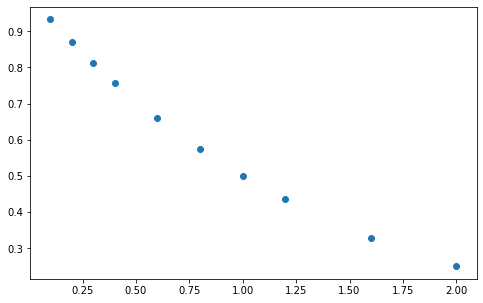

In [48]:

snum = np.arange(0.1,2.1,0.1)
snum = np.array([0.1,0.2,0.3,0.4,0.6,0.8,1,1.2,1.6,2])
# a1a2 = np.array([0.4,0.43,0.5,0.55,0.6,0.65,0.75,0.8,0.96,0.98])


fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(snum, 0.5**snum)
# ax.scatter(snum, -1/(snum+2)+3)
